# DB Project, data prep #1

In [14]:
# Importing relevant packages, loading relevant data.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

crime_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/Crimes_-_2015_to_Present.csv')
crime_class_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/Crimes_classes.csv')
beats_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/beats.csv')
weather_df = pd.read_csv('C:/Users/dcarb/Documents/Quarter3/ml/Project/weather_2015-2020.csv')

In [15]:
# Transforming crime data to datetime, indexing by such, limiting data to 2015-2020.

crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df = crime_df.set_index('Date')
crime_df = crime_df['20150101' : '20201231']

In [16]:
# Creating features for month, week of the current year, day of the week, and hour of day .

crime_df['Month'] = crime_df.index.month
crime_df['Week'] = crime_df.index.week
crime_df['Day'] = crime_df.index.day
crime_df['Hour'] = crime_df.index.hour

def find_watch(n):
    if 0 <= n < 8:
        return 'First'
    elif 8 <= n < 16:
        return 'Second'
    elif 16 <= n:
        return 'Third'
        

crime_df['Watch'] = crime_df['Hour'].apply(find_watch)

crime_df.index = crime_df.index.date

In [17]:
# Transforming weather data to datetime, indexing by such.

weather_df['Date'] = pd.to_datetime(weather_df['DATE'])
weather_df = weather_df.set_index('Date')

In [18]:
# Merging weather data to crime data.

crime_df = pd.merge(crime_df, weather_df, how = 'left', left_index = True, right_index = True)

In [19]:
# Preparing crime classes to merge into crime data, and merging.

for index, row in crime_class_df.iterrows():
    if len(row['crime_id']) == 3:
        row['crime_id'] = '0' + row['crime_id']

crime_df = pd.merge(crime_df, crime_class_df, how = 'left', left_on = 'IUCR', right_on = 'crime_id')        

In [20]:
# Merging beat data to crime data.  

crime_df = pd.merge(crime_df, beats_df, how = 'left', left_on = 'Beat', right_on = 'beat_num')

In [22]:
# Dropping undesired features.

col_list = ['ID','Arrest', 'Domestic', 'Beat', 'Year', 'Month', 'Week', 'Day', 'Hour', 'Watch', 
            'PRCP', 'SNOW','TMAX', 'TMIN', 'category_1', 'category_2', 'count_l_stops', 
            'count_bus_stops', 'count_metra_stops', 'count_restaurants', 'count_bars', 
            'count_daycares', 'count_entertainment', 'count_businesses', 'road_distance_ft', 
            'TOTAL POPULATION', 'dist_to_police', 'dist_to_hospital']

df = crime_df.filter(col_list)

In [23]:
# Describing data shape.

df.shape

(1542564, 28)

In [24]:
# Pulling random data point.

df.iloc[1200400]

ID                         11745330
Arrest                        False
Domestic                       True
Beat                            921
Year                           2019
Month                             7
Week                             27
Day                               3
Hour                             23
Watch                         Third
PRCP                           0.38
SNOW                            0.0
TMAX                             86
TMIN                             71
category_1                  serious
category_2                 property
count_l_stops                   0.0
count_bus_stops                31.0
count_metra_stops               0.0
count_restaurants              47.0
count_bars                      5.0
count_daycares                  4.0
count_entertainment             3.0
count_businesses              109.0
road_distance_ft           0.571819
TOTAL POPULATION       14053.802398
dist_to_police              0.03986
dist_to_hospital           0

In [25]:
# Pulling first 5 rows.

df.head()

,ID,Arrest,Domestic,Beat,Year,Month,Week,Day,Hour,Watch,...,count_metra_stops,count_restaurants,count_bars,count_daycares,count_entertainment,count_businesses,road_distance_ft,TOTAL POPULATION,dist_to_police,dist_to_hospital
0,10225520,False,False,411,2015,1,1,1,0,First,...,2.0,16.0,0.0,1.0,0.0,58.0,0.707356,5470.665210,0.022253,0.008498
1,11028448,True,True,1532,2015,1,1,1,0,First,...,0.0,14.0,2.0,1.0,0.0,24.0,0.516070,6459.881345,0.019838,0.020157
2,10225760,False,False,2024,2015,1,1,1,0,First,...,0.0,36.0,7.0,2.0,0.0,50.0,0.276870,11195.685959,0.025316,0.002818
3,11242929,False,False,223,2015,1,1,1,0,First,...,0.0,21.0,3.0,0.0,1.0,30.0,0.424687,7269.595565,0.020448,0.004761
4,10229179,False,False,214,2015,1,1,1,0,First,...,0.0,11.0,2.0,2.0,2.0,48.0,0.592841,6796.786889,0.020608,0.019376


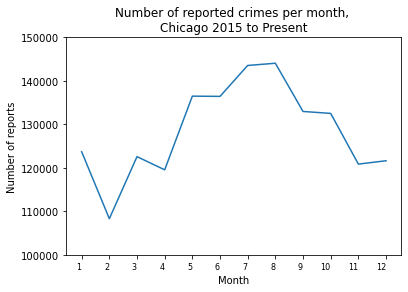

In [27]:
# Crime Count by month (5 year aggregate).

month_counts = df.groupby(by = [df.Month]).count()

month_counts['ID'].plot(kind='line')
plt.xticks(month_counts.index, rotation=0, size=8, ha='right')
plt.xlabel('Month')
plt.ylabel('Number of reports')
plt.ylim((100000,150000))
plt.title('Number of reported crimes per month, \nChicago 2015 to Present')
plt.show()

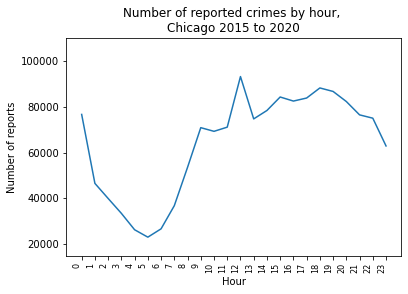

In [28]:
# Crime Count by time of day (5 year aggregate).

hour_counts = df.groupby(by = [df.Hour]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(hour_counts.index, rotation=90, size=8, ha='right')
plt.xlabel('Hour')
plt.ylabel('Number of reports')
plt.ylim((15000,110000))
plt.title('Number of reported crimes by hour, \nChicago 2015 to 2020')
plt.show()

In [ ]:
 # Crime Count by watch/shift (5 year aggregate).

hour_counts = df.groupby(by = [df.Watch]).count()

hour_counts['IUCR'].plot(kind='bar')
plt.xticks(rotation=0, size=8, ha='center')
plt.xlabel('Watch')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Watch, \nChicago 2015 to 2020')
plt.show()

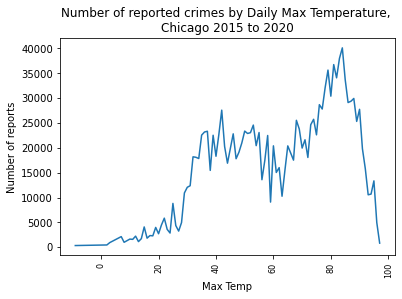

In [29]:
# Crime Count by maximum daily temperature (5 year aggregate).

hour_counts = df.groupby(by = [df.TMAX]).count()

hour_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='center')
plt.xlabel('Max Temp')
plt.ylabel('Number of reports')
plt.title('Number of reported crimes by Daily Max Temperature, \nChicago 2015 to 2020')
plt.show()

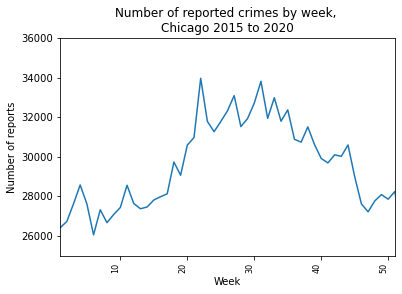

In [30]:
# Crime Count by week (5 year aggregate).

week_counts = df.groupby(by = [df.Week]).count()

week_counts['ID'].plot(kind='line')
plt.xticks(rotation=90, size=8, ha='right')
plt.xlabel('Week')
plt.ylabel('Number of reports')
plt.ylim((25000,36000))
plt.xlim((1,51))
plt.title('Number of reported crimes by week, \nChicago 2015 to 2020')
plt.show()

In [32]:
#Number of week/watch counts for a two-year period.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Week', 'Watch']).count()
print ('Week/ Watch max count:', week_watch_count['ID'].max())
print ('Week/ Watch min count:', week_watch_count['ID'].min())
print ('Week/ Watch median:', week_watch_count['ID'].median())


Week/ Watch max count: 5221
Week/ Watch min count: 1569
Week/ Watch median: 3908.5


In [33]:
#Number of month/hour counts for a two-year period.

week_watch_count = df[df['Year'].between(2017, 2018, inclusive=True)].groupby(['Year', 'Hour']).count()
print ('Month/ Hour max count:', week_watch_count['ID'].max())
print ('Month/ Hour min count:', week_watch_count['ID'].min())
print ('Month/ Hour median:', week_watch_count['ID'].median())

Month/ Hour max count: 16634
Month/ Hour min count: 3867
Month/ Hour median: 12606.5


In [34]:
df.to_csv(r'C:/Users/dcarb/Documents/Quarter3/ml/Project/crime_df.csv', index = False)